# Plotting Meteoroids

<p>This is a simple visualization program made using matplotlib and basemap.</p>
<p>The code mark all the places of meteoroids landing as red.</p>

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import re

In [94]:
df=pd.read_csv('meteorite-landings.csv',delimiter=',')

In [95]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [96]:
plot_frame=df[['GeoLocation']]

In [97]:
plot_frame=plot_frame.dropna()

In [98]:
plot_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38401 entries, 0 to 45715
Data columns (total 1 columns):
GeoLocation    38401 non-null object
dtypes: object(1)
memory usage: 600.0+ KB


In [99]:
def convert(coordinate):
    match=re.findall('-?\d*\.\d*',coordinate)
    return match

In [100]:
lat=list()
lon=list()
name=list()
for lab,row in plot_frame.iterrows():
    listy=convert(row['GeoLocation'])
    lat.append(float(listy[0]))
    lon.append(float(listy[1]))

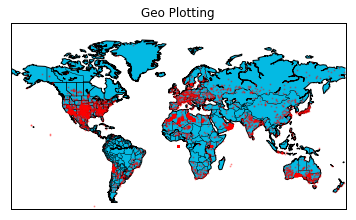

In [101]:
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')


x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=1,alpha=.3)

plt.title('Geo Plotting')
plt.show()